<a href="https://colab.research.google.com/github/tahio12/omar/blob/master/Data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Leader- Omar Tahir - otahi001@gold.ac.uk, 33684350
 
 Matei-Nicolae Turcu - mturc001@campus.goldsmiths.ac.uk, 3365097301

# Objective
The objective of this project is to predict which customer might default in the following month. 

Credit default occurs if the lender decides to close your account because you've missed payments.

# Dataset

The dataset we are using is creditdefault, and the following are the variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. One tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditdefault_train.csv to creditdefault_train (1).csv
Saving creditdefault_test.csv to creditdefault_test (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Load Data


train_df = pd.read_csv('creditdefault_train.csv')
test_df = pd.read_csv('creditdefault_test.csv')

In the code above we import all the libraries needed for this project, and we load the train and test data ib tran_df and test_df.

In [ ]:
train_df.sample(5)

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
13012,0,280000,2,2,2,46,0,0,2,2,...,151984,47851,49374,50198,126000,3000,0,3000,2000,2000
12692,0,410000,2,1,2,28,0,0,0,0,...,11546,858,0,1117,2444,3056,968,0,1117,0
14181,1,180000,2,3,1,46,-1,2,-1,0,...,8469,6591,5244,2174,357,8510,5244,2174,0,3371
5832,1,20000,1,1,2,24,1,-2,-2,-2,...,0,0,0,1273,0,0,0,0,1273,0
988,0,30000,2,3,1,35,1,-2,-1,0,...,2605,893,895,2328,0,2610,18,2,2333,1


Showing 5 samples of the training data

In [ ]:
train_df.head()
train_df.describe()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       15000 non-null  int64
 1   X1      15000 non-null  int64
 2   X2      15000 non-null  int64
 3   X3      15000 non-null  int64
 4   X4      15000 non-null  int64
 5   X5      15000 non-null  int64
 6   X6      15000 non-null  int64
 7   X7      15000 non-null  int64
 8   X8      15000 non-null  int64
 9   X9      15000 non-null  int64
 10  X10     15000 non-null  int64
 11  X11     15000 non-null  int64
 12  X12     15000 non-null  int64
 13  X13     15000 non-null  int64
 14  X14     15000 non-null  int64
 15  X15     15000 non-null  int64
 16  X16     15000 non-null  int64
 17  X17     15000 non-null  int64
 18  X18     15000 non-null  int64
 19  X19     15000 non-null  int64
 20  X20     15000 non-null  int64
 21  X21     15000 non-null  int64
 22  X22     15000 non-null  int64
 23  X23     150

In [ ]:
train_df.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

Checking if we have any null variables

In [ ]:
test_df.shape

(15000, 24)

In [ ]:
train_df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23'],
      dtype='object')

<Axes: xlabel='Y', ylabel='count'>

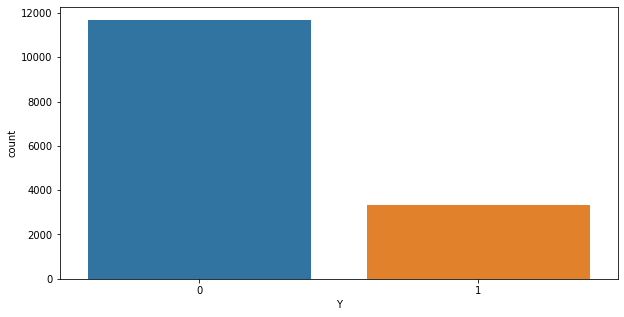

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Y', data = train_df)

The graph above shows that both classes are in proportion and we have an imbalanced dataset.

In [ ]:
train_df['Y'].value_counts()

0    11682
1     3318
Name: Y, dtype: int64

In [ ]:
train_df['X2'].value_counts()

2    9073
1    5927
Name: X2, dtype: int64

In [ ]:
train_df['X3'].value_counts()

2    7015
1    5312
3    2458
5     126
4      56
6      30
0       3
Name: X3, dtype: int64

In [ ]:
fil = (train_df['X3'] == 5) | (train_df['X3'] == 6) | (train_df['X3'] == 0)
train_df.loc[fil, 'X3'] = 4
train_df['X3'].value_counts()



2    7015
1    5312
3    2458
4     215
Name: X3, dtype: int64

In [ ]:
train_df['X4'].value_counts()

2    8031
1    6771
3     170
0      28
Name: X4, dtype: int64

In [ ]:
fil = train_df['X4'] == 0
train_df.loc[fil, 'X4'] = 3
train_df['X4'].value_counts()

2    8031
1    6771
3     198
Name: X4, dtype: int64

# Plotting the categorical features

In [ ]:
categorical_features = ['X2', 'X3', 'X4']

In [ ]:
df_cat = train_df[categorical_features]
df_cat['Defaulter'] = train_df['Y']

In [ ]:
df_cat.replace({'X2': {1 : 'MALE', 2 : 'FEMALE'}, 'X3' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'X4' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 720x360 with 0 Axes>

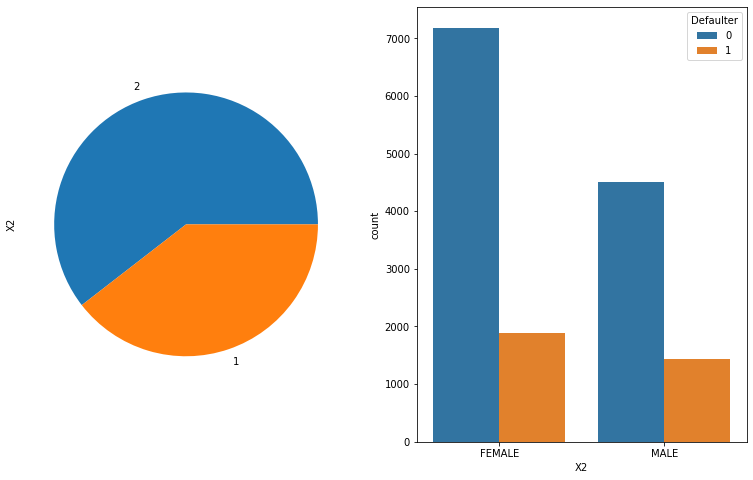

<Figure size 720x360 with 0 Axes>

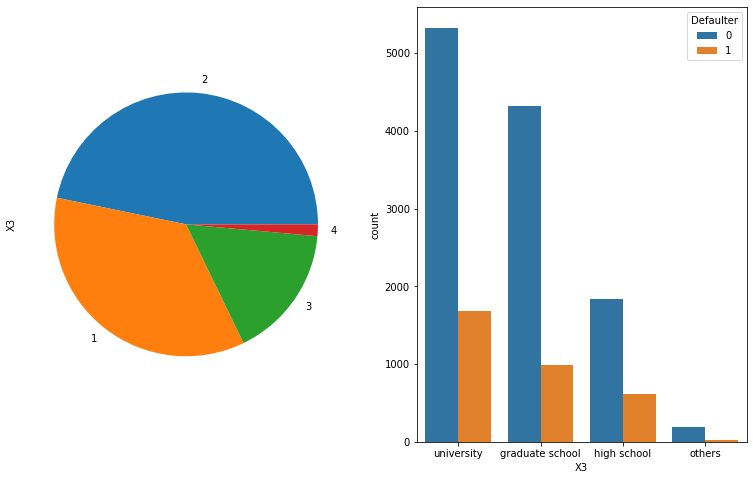

<Figure size 720x360 with 0 Axes>

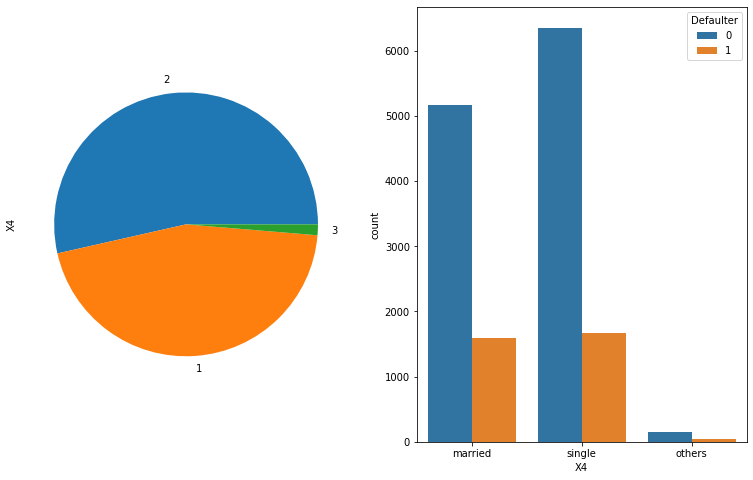

In [ ]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  train_df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

As we can see in the figures above, there are more female credit card holders therefore the number of defaulters has a high proportion of females

Educated people that went to university and graduate school have a higher chance of defaulting, also single people are more likely to default.


In [ ]:
train_df['X1'].min()

10000

In [ ]:
train_df['X1'].describe()

count     15000.000000
mean     167450.245333
std      130109.925023
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: X1, dtype: float64

<Axes: xlabel='Y', ylabel='X1'>

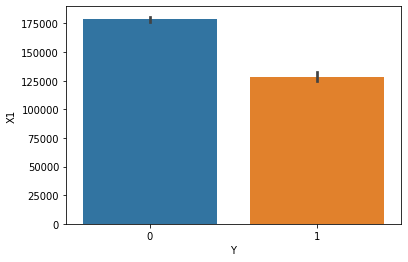

In [ ]:
sns.barplot(x='Y', y='X1', data=train_df)

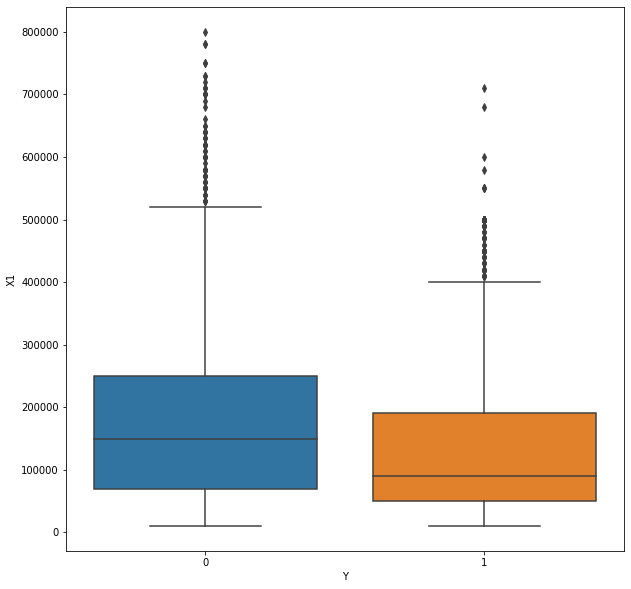

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Y", y="X1", data=train_df)

# Plotting a graph with the ages of all people with credit cards

In [ ]:
train_df['X5'].value_counts()

29    784
30    724
27    715
28    693
26    664
31    609
32    596
34    589
25    587
33    586
24    575
36    548
35    543
37    508
23    493
38    462
39    453
40    439
42    412
41    410
44    346
43    339
45    317
46    291
22    285
47    264
48    224
49    222
50    206
51    176
52    153
53    142
54    120
55     94
56     82
57     58
58     56
21     36
59     35
60     33
61     28
62     20
65     17
66     15
64     15
63     12
69      9
67      6
70      4
75      2
68      2
72      1
Name: X5, dtype: int64

In [ ]:
train_df['X5']=train_df['X5'].astype('int')

<Axes: xlabel='index', ylabel='X5'>

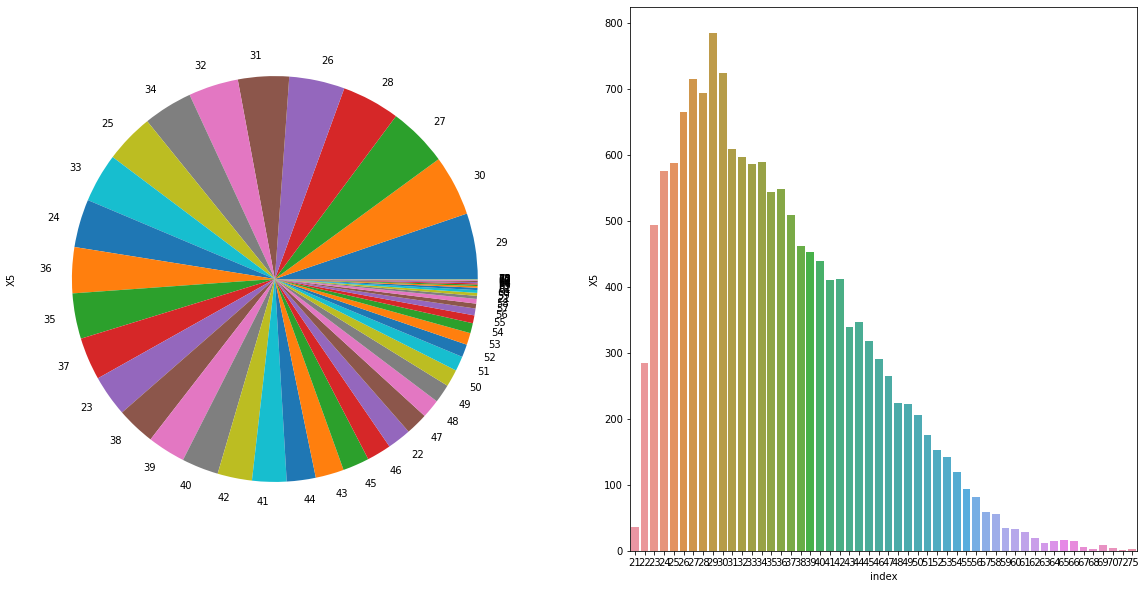

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_df=train_df['X5'].value_counts().reset_index()
train_df['X5'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='X5',data=Day_df,ax = axes[1],orient='v')

Plotting a graph with all the ages and we can see that the higher the age, the less people that have credit cards.

In [ ]:
train_df.groupby('Y')['X5'].mean()

Y
0    35.314244
1    35.556962
Name: X5, dtype: float64

In [ ]:
df = train_df.astype('int')

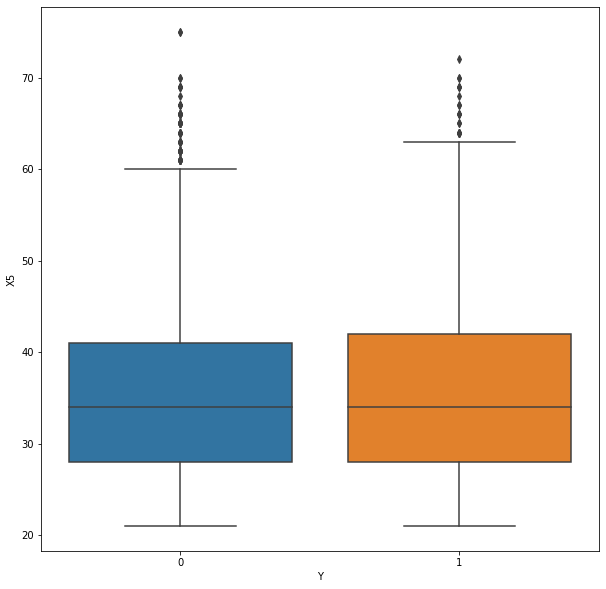

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Y", y="X5", data=df)

# Bill amount

In [ ]:
bill_amnt_df = train_df[['X12','X13','X14','X15','X16','X17']]

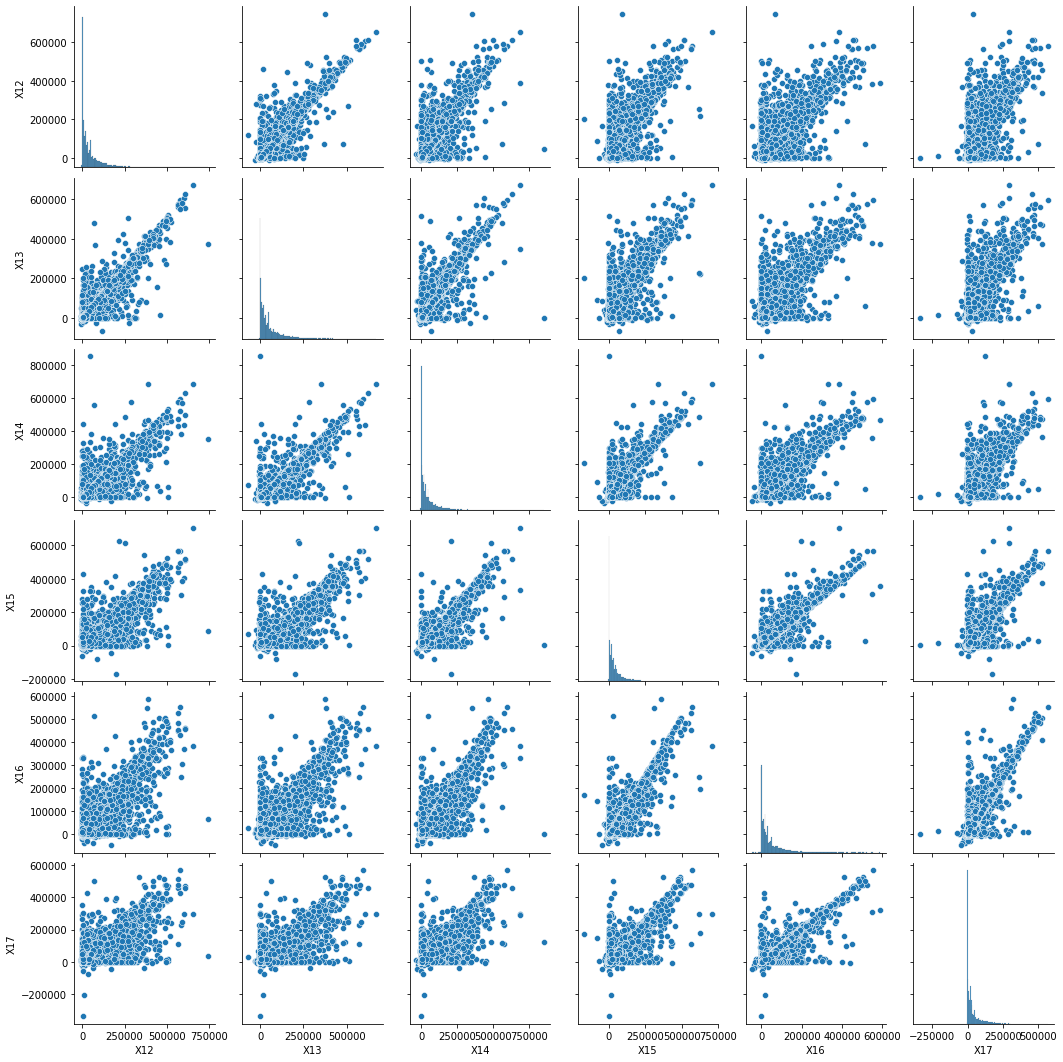

In [ ]:
sns.pairplot(data = bill_amnt_df)

# History payment status

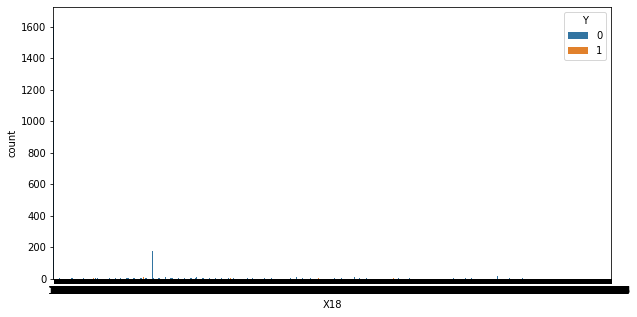

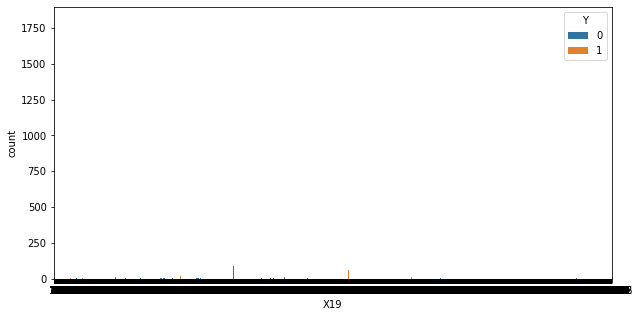

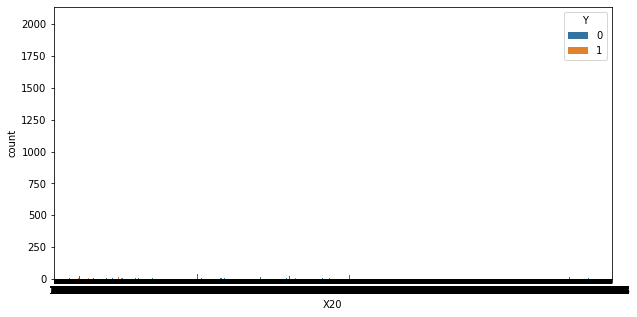

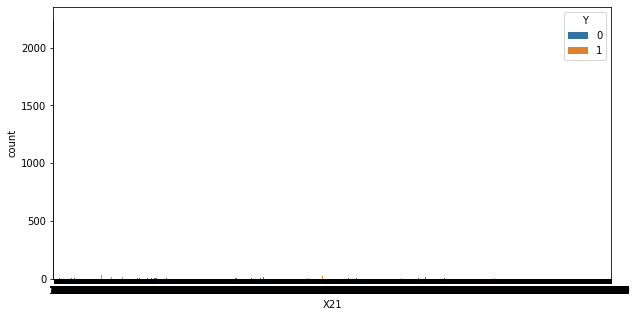

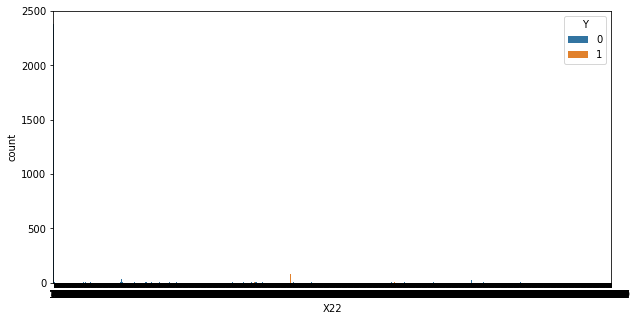

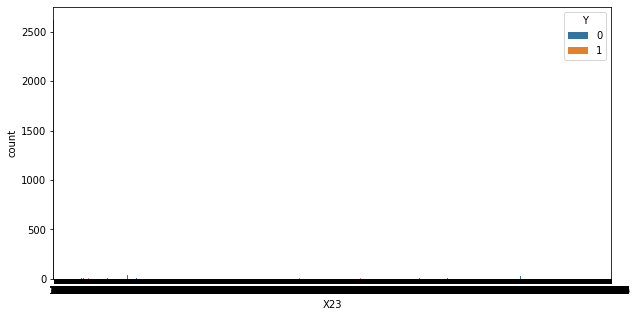

In [ ]:
pay_col = ['X18',	'X19',	'X20',	'X21',	'X22',	'X23']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Y', data = train_df)

# Paid amount

In [ ]:
pay_amnt_df = df[['X6',	'X7',	'X8',	'X9',	'X10',	'X11', 'Y']]

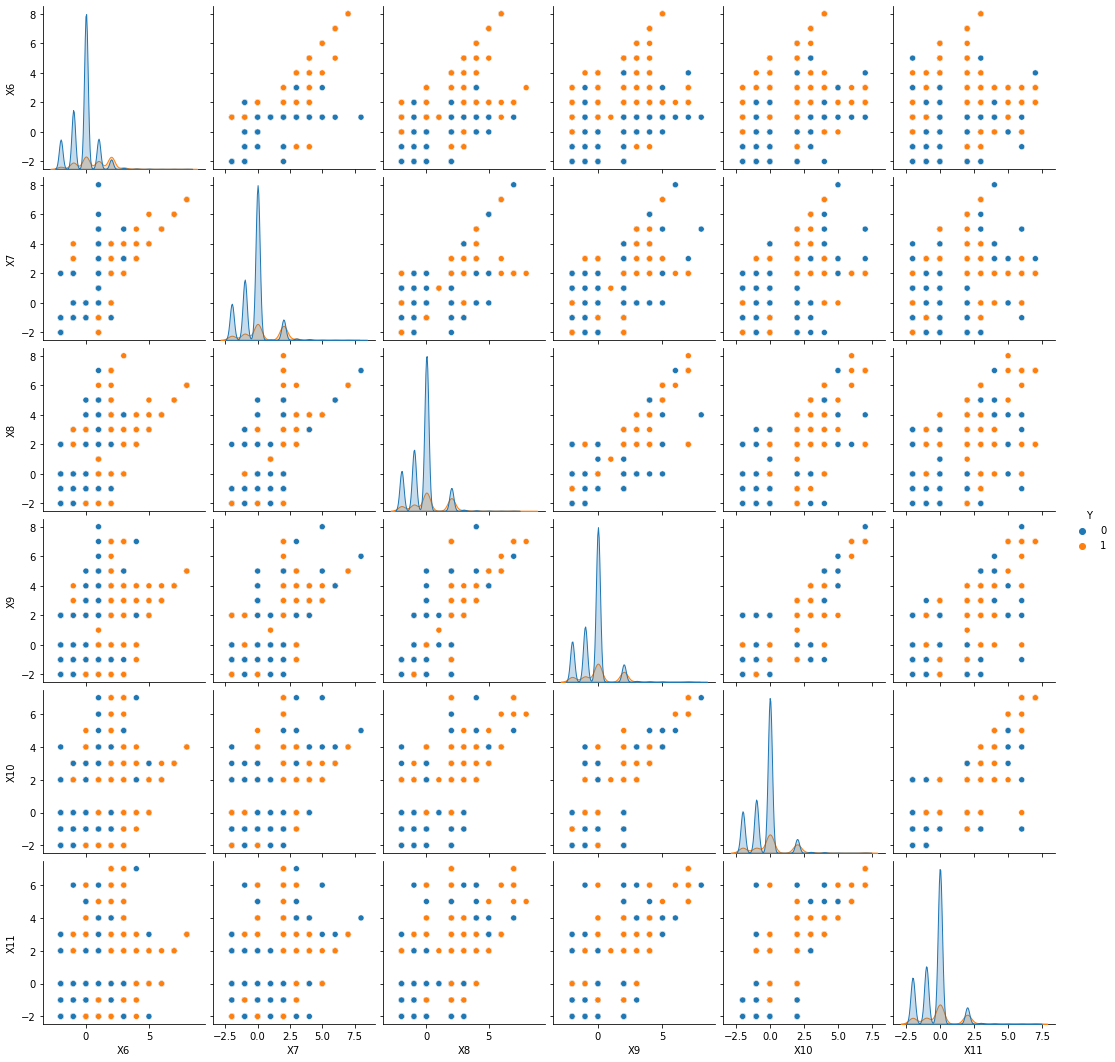

In [ ]:
sns.pairplot(data = pay_amnt_df, hue='Y')

In [ ]:
df.shape

(15000, 24)

# Balancing the dataset

As we have seen before the dataset is imbalanced, and not we are using SMOTE (Synthetic Minority Oversampling Technique) to balance it.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['Y'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 15000
Resampled dataset shape 23364


In [ ]:
x_smote

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
0,1,20000,2,2,1,24,2,2,-1,-1,...,3102,689,0,0,0,0,689,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
2,0,50000,1,2,1,57,-1,0,-1,0,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689
3,0,50000,1,1,2,37,0,0,0,0,...,57069,57608,19394,19619,20024,2500,1815,657,1000,1000
4,0,500000,1,1,2,29,0,0,0,0,...,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23359,1,140000,1,1,1,54,1,-2,-2,-2,...,-32,-32,-32,-32,-32,0,0,0,0,0
23360,1,200670,1,1,2,32,1,0,0,0,...,130827,131509,145618,142800,152621,7489,3221,16224,0,12076
23361,1,20000,1,1,1,39,1,0,0,0,...,17143,17002,18285,17872,18524,1634,1365,1636,479,1003
23362,1,80000,2,2,1,51,2,2,2,2,...,65175,65946,68625,69313,68847,2900,2404,4250,2404,776


In [ ]:
columns = list(df.columns)

In [ ]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,500000,1,1,2,29,0,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,100000,1,1,2,38,0,-1,-1,0,0,...,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000
14996,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
14997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
14998,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [ ]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [ ]:
balance_df['IsDefaulter'] = y_smote

<Axes: xlabel='IsDefaulter', ylabel='count'>

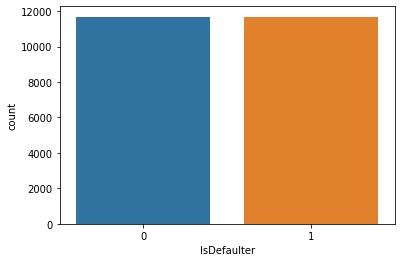

In [ ]:
sns.countplot(x='IsDefaulter', data=balance_df)

In [ ]:
balance_df[balance_df['IsDefaulter']==1]

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,NaN,1
7,1,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,NaN,1
9,1,450000,2,1,1,40,-2,-2,-2,-2,...,560,0,0,19428,1473,560,0,0,NaN,1
11,1,50000,1,2,2,33,2,0,0,0,...,22734,23217,23680,1718,1500,1000,1000,1000,NaN,1
15,1,50000,1,1,2,25,1,-1,-1,-2,...,0,0,0,780,0,0,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23359,1,140000,1,1,1,54,1,-2,-2,-2,...,-32,-32,-32,0,0,0,0,0,NaN,1
23360,1,200670,1,1,2,32,1,0,0,0,...,145618,142800,152621,7489,3221,16224,0,12076,NaN,1
23361,1,20000,1,1,1,39,1,0,0,0,...,18285,17872,18524,1634,1365,1636,479,1003,NaN,1
23362,1,80000,2,2,1,51,2,2,2,2,...,68625,69313,68847,2900,2404,4250,2404,776,NaN,1


# Feature engineering

In [ ]:
df_fr = balance_df.copy()

In [ ]:
df_fr['Payement_Value'] = df_fr['X6'] + df_fr['X7'] + df_fr['X8'] + df_fr['X9'] + df_fr['X10'] + df_fr['X11']

In [ ]:
df_fr.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.976973
1    1.743794
Name: Payement_Value, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='Payement_Value'>

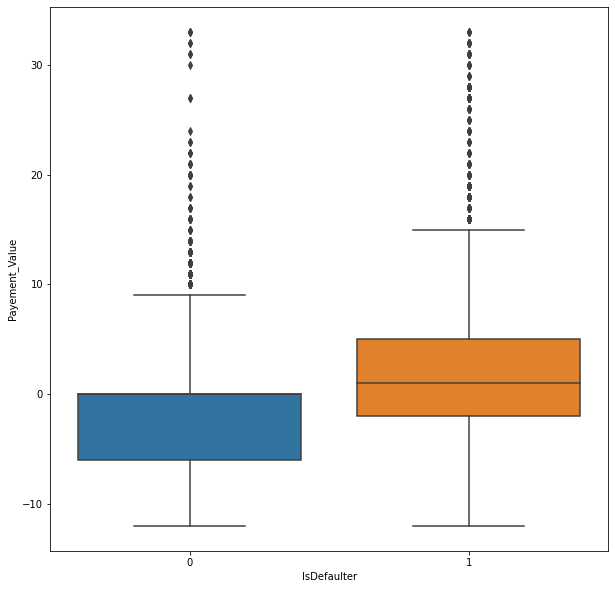

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payement_Value' )

In [ ]:
df_fr['Dues'] = (df_fr['X12']+df_fr['X13']+df_fr['X14']+df_fr['X15']+df_fr['X16'])-(df_fr['X17']+df_fr['X18']+df_fr['X19']+df_fr['X20']+df_fr['X21']+df_fr['X22'])

In [ ]:
df_fr.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    165631.489985
1    175091.868601
Name: Dues, dtype: float64

In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,500000,1,1,2,29,0,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,100000,1,1,2,38,0,-1,-1,0,0,...,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000
14996,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
14997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
14998,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [ ]:
df_fr['X3'].unique()

array([2, 1, 3, 4])

In [ ]:
df_fr['X3']=np.where(df_fr['X3'] == 6, 4, df_fr['X3'])
df_fr['X3']=np.where(df_fr['X3'] == 0, 4, df_fr['X3'])

In [ ]:
df_fr['X4'].unique()

array([1, 2, 3])

In [ ]:
df_fr['X4']=np.where(df_fr['X4'] == 0, 3, df_fr['X4'])

In [ ]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
df_fr.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X17,X18,X19,X20,X21,X22,X23,IsDefaulter,Payement_Value,Dues
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,NaN,1,-2,7015
1,0,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,NaN,0,0,164852
2,0,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,NaN,0,-2,12707
3,0,50000,1,1,2,37,0,0,0,0,...,20024,2500,1815,657,1000,1000,NaN,0,0,191094
4,0,500000,1,1,2,29,0,0,0,0,...,473944,55000,40000,38000,20239,13750,NaN,0,0,1609718


# One Hot Encoding
We are using one hot encoding to improve the accuracy of our results


In [ ]:
df_fr = pd.get_dummies(df_fr,columns=['X3','X4'])

In [ ]:
df_fr.head()

,Y,X1,X2,X5,X6,X7,X8,X9,X10,X11,...,IsDefaulter,Payement_Value,Dues,X3_1,X3_2,X3_3,X3_4,X4_1,X4_2,X4_3
0,1,20000,2,24,2,2,-1,-1,-2,-2,...,1,-2,7015,0,1,0,0,1,0,0
1,0,50000,2,37,0,0,0,0,0,0,...,0,0,164852,0,1,0,0,1,0,0
2,0,50000,1,57,-1,0,-1,0,0,0,...,0,-2,12707,0,1,0,0,1,0,0
3,0,50000,1,37,0,0,0,0,0,0,...,0,0,191094,1,0,0,0,0,1,0
4,0,500000,1,29,0,0,0,0,0,0,...,0,0,1609718,1,0,0,0,0,1,0


In [ ]:
df_fr.drop(['X3_3','X4_3'],axis = 1, inplace = True)

In [ ]:
df_fr = pd.get_dummies(df_fr, columns = ['X6',	'X7',	'X8',	'X9',	'X10',	'X11'], drop_first = True )

In [ ]:
df_fr.head()

,Y,X1,X2,X5,X12,X13,X14,X15,X16,X17,...,X10_7,X11_-1,X11_0,X11_1,X11_2,X11_3,X11_4,X11_5,X11_6,X11_7
0,1,20000,2,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,50000,2,37,46990,48233,49291,28314,28959,29547,...,0,0,1,0,0,0,0,0,0,0
2,0,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,0,1,0,0,0,0,0,0,0
3,0,50000,1,37,64400,57069,57608,19394,19619,20024,...,0,0,1,0,0,0,0,0,0,0
4,0,500000,1,29,367965,412023,445007,542653,483003,473944,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [ ]:
df_fr.head()

,Y,X1,X2,X5,X12,X13,X14,X15,X16,X17,...,X10_7,X11_-1,X11_0,X11_1,X11_2,X11_3,X11_4,X11_5,X11_6,X11_7
0,1,20000,2,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,50000,2,37,46990,48233,49291,28314,28959,29547,...,0,0,1,0,0,0,0,0,0,0
2,0,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,0,1,0,0,0,0,0,0,0
3,0,50000,1,37,64400,57069,57608,19394,19619,20024,...,0,0,1,0,0,0,0,0,0,0
4,0,500000,1,29,367965,412023,445007,542653,483003,473944,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_fr.to_csv('Final_df.csv')

In [ ]:
df_fr = pd.read_csv('./Final_df.csv')

In [ ]:
df_fr.head()

,Unnamed: 0,Y,X1,X2,X5,X12,X13,X14,X15,X16,...,X10_7,X11_-1,X11_0,X11_1,X11_2,X11_3,X11_4,X11_5,X11_6,X11_7
0,0,1,20000,2,24,3913,3102,689,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,50000,2,37,46990,48233,49291,28314,28959,...,0,0,1,0,0,0,0,0,0,0
2,2,0,50000,1,57,8617,5670,35835,20940,19146,...,0,0,1,0,0,0,0,0,0,0
3,3,0,50000,1,37,64400,57069,57608,19394,19619,...,0,0,1,0,0,0,0,0,0,0
4,4,0,500000,1,29,367965,412023,445007,542653,483003,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_fr.drop(['X23'],axis = 1, inplace = True)

In [ ]:
df_fr.head()

,Unnamed: 0,Y,X1,X2,X5,X12,X13,X14,X15,X16,...,X10_7,X11_-1,X11_0,X11_1,X11_2,X11_3,X11_4,X11_5,X11_6,X11_7
0,0,1,20000,2,24,3913,3102,689,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,50000,2,37,46990,48233,49291,28314,28959,...,0,0,1,0,0,0,0,0,0,0
2,2,0,50000,1,57,8617,5670,35835,20940,19146,...,0,0,1,0,0,0,0,0,0,0
3,3,0,50000,1,37,64400,57069,57608,19394,19619,...,0,0,1,0,0,0,0,0,0,0
4,4,0,500000,1,29,367965,412023,445007,542653,483003,...,0,0,1,0,0,0,0,0,0,0


Logistic Regression
Logistic regression estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event.

In [ ]:
df_log_reg = df_fr.copy()

In [ ]:
df_log_reg.tail()

,Unnamed: 0,Y,X1,X2,X5,X12,X13,X14,X15,X16,...,X10_7,X11_-1,X11_0,X11_1,X11_2,X11_3,X11_4,X11_5,X11_6,X11_7
23359,23359,1,140000,1,54,-32,-32,-32,-32,-32,...,0,0,0,0,0,0,0,0,0,0
23360,23360,1,200670,1,32,126247,130827,131509,145618,142800,...,0,0,0,0,1,0,0,0,0,0
23361,23361,1,20000,1,39,17855,17143,17002,18285,17872,...,0,0,1,0,0,0,0,0,0,0
23362,23362,1,80000,2,51,63920,65175,65946,68625,69313,...,0,0,0,1,0,0,0,0,0,0
23363,23363,1,142209,2,25,2257,16173,241,1410,1168,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
train_df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


# k-Nearest Neighbour

In [ ]:
# select features and target variable
features = train_df.columns[:-1]
target = 'Y'

# split data into train and validation sets
train_features, val_features, train_target, val_target = train_test_split(
    train_df[features], train_df[target], test_size=0.2, random_state=42)

# create k-Nearest Neighbour classifier
KNeighbours = KNeighborsClassifier()

# specify parameter grid for k-Nearest Neighbour classifier
parameter_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# perform grid search with cross-validation
grid_search = GridSearchCV(KNeighbours, parameter_grid, cv=5)
grid_search.fit(train_features, train_target)

# select best k-NN model
best_KNeighbours = grid_search.best_estimator_

# evaluate model on validation set
val_predictions = best_KNeighbours.predict(val_features)
print(classification_report(val_target, val_predictions))

# evaluate model on test set
test_features = test_df[features]
test_target = test_df[target]
test_predictions = best_KNeighbours.predict(test_features)
print(classification_report(test_target, test_predictions))

              precision    recall  f1-score   support

           0       0.79      0.95      0.87      2339
           1       0.43      0.13      0.20       661

    accuracy                           0.77      3000
   macro avg       0.61      0.54      0.53      3000
weighted avg       0.71      0.77      0.72      3000

              precision    recall  f1-score   support

           0       0.79      0.95      0.86     11682
           1       0.38      0.11      0.18      3318

    accuracy                           0.76     15000
   macro avg       0.58      0.53      0.52     15000
weighted avg       0.70      0.76      0.71     15000



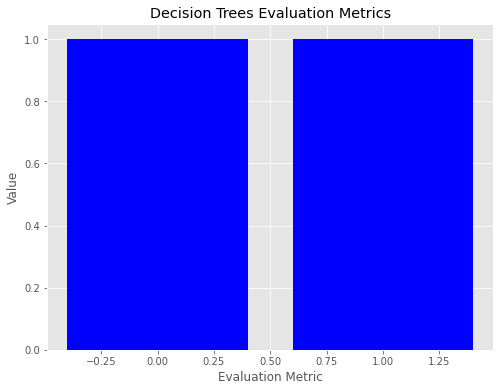

In [ ]:
# Define the evaluation metrics and their values
metrics = ['Accuracy', 'Precision']
values = [test_target, test_predictions]

# Set the plot size and style
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')

# Create the bar plot
plt.bar(test_target, test_predictions, color='blue')

# Add labels and titles
plt.xlabel('Evaluation Metric')
plt.ylabel('Value')
plt.title('Decision Trees Evaluation Metrics')

# Display the plot
plt.show()

# Decision Trees

In [ ]:
# Initialize the model
DecisionTree = DecisionTreeClassifier()

# Fit the model
parameters = {'max_depth': [3, 5, 7, 10]}

# Grid Search Cross Validation
grid_search = GridSearchCV(DecisionTree, parameters, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score from the grid search
best_DecisionTree = grid_search
# Predict the test set
y_pred = best_DecisionTree.predict(X_test)
# Evaluate the model
DecisionTree_accuracy = accuracy_score(y_test, y_pred)
DecisionTree_precision = precision_score(y_test, y_pred, average='weighted' , zero_division=1)
DecisionTree_recall = recall_score(y_test, y_pred, average='weighted' , zero_division=1)
DecisionTree_f1_score = f1_score(y_test, y_pred, average='weighted')

print('Decision Trees')
print('Accuracy:', DecisionTree_accuracy)
print('Precision:', DecisionTree_precision)
print('Recall:', DecisionTree_recall)
print('F1 Score:', DecisionTree_f1_score)


Decision Trees
Accuracy: 0.27813333333333334
Precision: 0.6716006822417432
Recall: 0.27813333333333334
F1 Score: 0.17023150724162486


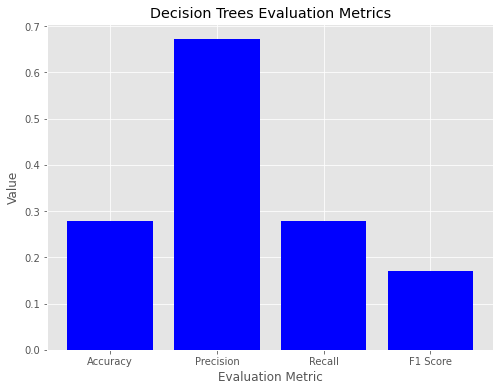

In [ ]:
# Define the evaluation metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [DecisionTree_accuracy, DecisionTree_precision, DecisionTree_recall, DecisionTree_f1_score]

# Set the plot size and style
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')

# Create the bar plot
plt.bar(metrics, values, color='blue')

# Add labels and titles
plt.xlabel('Evaluation Metric')
plt.ylabel('Value')
plt.title('Decision Trees Evaluation Metrics')

# Display the plot
plt.show()

# AdaBoost

In [ ]:
# Define the AdaBoost classifier
ada_clf = AdaBoostClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    "n_estimators": [2, 4, 6],
    "learning_rate": [0.1, 0.5, 1.0]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(ada_clf, param_grid, cv=2, scoring="accuracy")

# Fit the GridSearchCV object on the training set
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Create a new AdaBoost classifier with the best hyperparameters
best_ada_clf = AdaBoostClassifier(n_estimators=best_params["n_estimators"],
                                  learning_rate=best_params["learning_rate"],
                                  random_state=42)

# Train the best AdaBoost classifier on the full training set
best_ada_clf.fit(X_train, y_train)

# Evaluate the best AdaBoost classifier on the validation set
val_score = best_ada_clf.score(X_train, y_train)

print("AdaBoost")
print("Best parameters:", best_params)
print("Best score:", best_score)
print("Validation score:", val_score)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 2}
Best score: 0.24293333333333333
Validation score: 0.24293333333333333


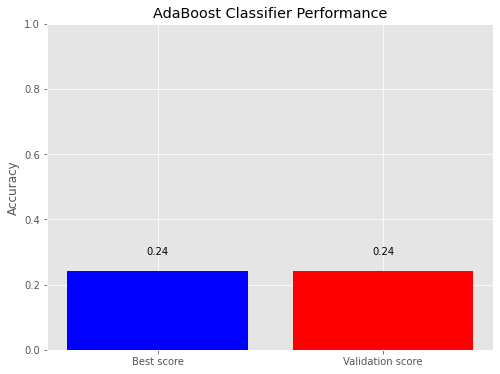

In [ ]:
# Data
values = [best_score, val_score]
labels = ['Best score', 'Validation score']
colors = ['blue', 'red']
x_pos = range(len(values))

# Figure and axis setup
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylim([0, 1])
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('AdaBoost Classifier Performance')
plt.grid(True, axis='y')

# Bars
ax.bar(x_pos, values, color=colors)

# Annotations
for i, v in enumerate(values):
    ax.text(i, v+0.05, str(round(v,2)), ha='center')

# Show the plot
plt.show()

# Random Forest

In [ ]:
# Initialize the model
RandomForest = RandomForestClassifier()

# Fit the model
params = {'n_estimators': [20], 'max_depth': [1, 2, 3, 4, 5]}

# Grid Search Cross Validation
grid_search = GridSearchCV(RandomForest, params, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score from the grid search
best_RandomForest = grid_search
# Predict the test set
y_pred = best_RandomForest.predict(X_test)
# Evaluate the model
RandomForest_accuracy = accuracy_score(y_test, y_pred)
RandomForest_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
RandomForest_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
RandomForest_f1_score = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print('Random Forest')
print('Accuracy:', RandomForest_accuracy)
print('Precision:', RandomForest_precision)
print('Recall', RandomForest_recall)
print('F1 Score', RandomForest_f1_score)

Random Forest
Accuracy: 0.2648
Precision: 0.7212759929910749
Recall 0.2648
F1 Score 0.13428074230812875


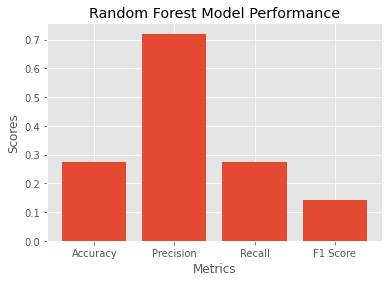

In [ ]:
# Create a list of metric names and scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [RandomForest_accuracy, RandomForest_precision, RandomForest_recall, RandomForest_f1_score]

# Plot the scores
plt.bar(metrics, scores)
plt.title('Random Forest Model Performance')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.show()

# Svm

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the SVM model
model = svm.SVC()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 4],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.bestparams

# Train the SVM model using the best hyperparameters
model = svm.SVC(**best_params)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, ROC-AUC Score: {roc_auc:.2f}")

# Evaluation

The best model from the above models is KNN (k-Nearest Neighbour), which performed the best from all the other models, with an accuracy of 0.76 and precision of 0.79. The second best model was Random Forest with an accuracy of 0.2726 and a precision of 0.7205. The next best performing models in order were Decision Tree, AdaBoost and the lowest being SVM.

In conclusion, KNN (k-nearest Neighbour) is the best model out of the 5 models.

References

1. BANSODE , S.A.N.D.E.E.P. (no date) Credit Card💳 Default Prediction. Available at: https://www.kaggle.com/code/bansodesandeep/credit-card-default-prediction 